In [1]:
import numpy as np
import igraph as ig
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as st
import pickle

sns.set()

In [2]:
with open('data/pickles/complete_df.pickle','rb') as f:
    df = pickle.load(f)

Costruisco per i primi 15 giorni una la rete aggiungengio un giorno alla volta, partendo da 3 giorni, e confronto la densità o la dimensone della componente connessa

In [3]:
df['day_count'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [4]:
def build_graph(data_retweet, fini_day,init_day = 0):
    sub_set = data_retweet[(data_retweet.day_count >= init_day)&(data_retweet.day_count < fini_day)]
    db_for_network = sub_set.groupby(['retweeted_status.user.id','user.id'], as_index=False).count()
    db_for_network = db_for_network[db_for_network.weight > 1]#.astype(int)
    return ig.Graph.TupleList(db_for_network[['retweeted_status.user.id','user.id','weight',]].itertuples(index=False), directed=True, weights=True)

In [5]:
graphs_first_15  = []
for day in range(3,16):
    graphs_first_15.append(build_graph(df, day)) 

da ognuno misuro la dimensione della più gande componente connessa

In [6]:
giant_connected_component_dimension = []
relative_gcc_dimension = []
for g in graphs_first_15:
    cl = g.components(mode='WEAK') #STRONG means that each pair of vertex must be reachable from each other
    giant_connected_component_dimension.append(len(cl.giant().vs))
    relative_gcc_dimension.append(len(cl.giant().vs)/len(g.vs))

faccio lo stesso per gli ultimi 15 giorni

In [15]:
graphs_last_15  = []
for day in range(18,31):
    graphs_last_15.append(build_graph(df, day, init_day=15))
    
giant_connected_component_dimension_bis = []
relative_gcc_dimension_bis = []
for g in graphs_last_15:
    cl = g.components(mode='WEAK') 
    giant_connected_component_dimension_bis.append(len(cl.giant().vs))
    relative_gcc_dimension_bis.append(len(cl.giant().vs)/len(g.vs))

calcolo anche le densità

In [20]:
density_first = [g.density() for g in graphs_first_15]
density_last = [g.density() for g in graphs_last_15]

In [40]:
len(giant_connected_component_dimension)

13

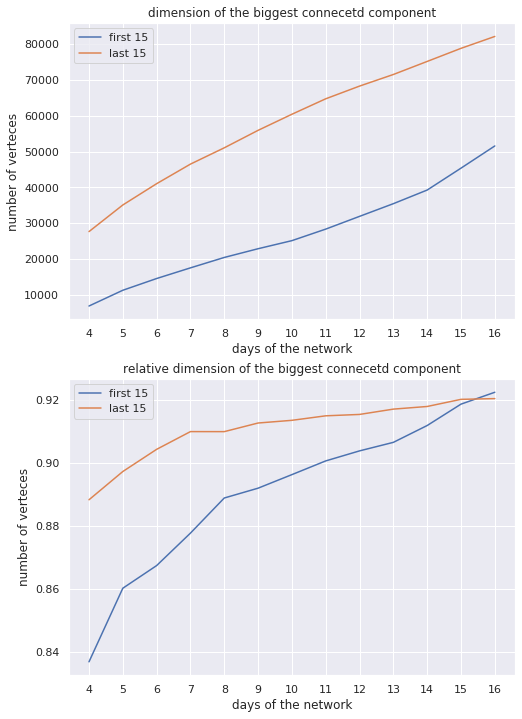

In [42]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (8,12))
ax1.plot(giant_connected_component_dimension, label='first 15')
ax1.plot(giant_connected_component_dimension_bis,label='last 15')
ax1.set_title('dimension of the biggest connecetd component')
ax1.set_ylabel('number of verteces')
ax1.set_xlabel('days of the network')
ax1.set_xticks(range(13))
ax1.set_xticklabels(range(4,17))
ax1.legend()
ax2.plot(relative_gcc_dimension,label='first 15')
ax2.plot(relative_gcc_dimension_bis, label='last 15')
ax2.set_title('relative dimension of the biggest connecetd component')
ax2.set_ylabel('number of verteces')
ax2.set_xlabel('days of the network')
ax2.set_xticks(range(13))
ax2.set_xticklabels(range(4,17))
ax2.legend()

in entrambi i periodi la componente connessa tende a coprire tutto il network mano a mano che si aggiungono giorni, quindi nodi e link, al network. Nel secondo periodo appare comunque fin da subito più grande, sembra coprire tutto la maggiorparte del network in meno tempo.

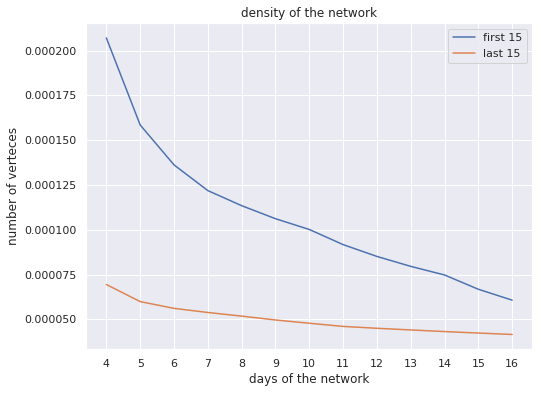

In [46]:
fig,ax = plt.subplots(1,1, figsize= (8,6))
ax.plot(density_first, label='first 15')
ax.plot(density_last, label = 'last 15')
ax.set_title('density of the network')
ax.set_ylabel('number of verteces')
ax.set_xlabel('days of the network')
ax.set_xticks(range(13))
ax.set_xticklabels(range(4,17))
ax.legend()

la densità tende a diminuire, il che probabilmente significa che aumentano i nuovi nodi (quindi utenti che retweetano) e quindi aumentano i possibili collegamenti della rete ->  n*(n-1) / 2

Cosa accade se utilizzo il mode=STRONG per la ricerca della componente conessa, ovvero ogni coppia di utenti deve essere raggiungibile partendo da ciascuno dei due

In [97]:
gcc_strong = [[],[]]
rel_gcc_strong = [[],[]]
for g in graphs_first_15:
    cl = g.components(mode='STRONG') 
    gcc_strong[0].append(cl.giant().vcount())
    rel_gcc_strong[0].append(len(cl.giant().vs)/g.vcount())

for g in graphs_last_15:
    cl = g.components(mode='STRONG') 
    gcc_strong[1].append(len(cl.giant().vs))
    rel_gcc_strong[1].append(len(cl.giant().vs)/len(g.vs))

In [98]:
gcc_strong

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

Non sono presenti componenti di tal tipo

In [207]:
g_tot = build_graph(df,30)

In [208]:
g_tot.density()

3.775366155024702e-05

In [211]:
g_tot.components(mode='WEAK').giant().vcount()/g_tot.vcount()  #relative size of the giant component

0.9340289293094212